<a href="https://colab.research.google.com/github/Sandritahm/awesome-cheatsheets/blob/master/NN_regression_housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Model
## Sandra Diaz 2017770

Dataset includes 36 rows of data and 4 features.

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("/content/Regression Assignment - Dataset.xlsx")

In [3]:
data.head()

,Price,Sqft,Beds,Baths,Col
0,840000,2768,4,3.5,1
1,822000,2500,4,2.5,1
2,713000,2400,3,3.0,1
3,689000,2200,3,2.5,1
4,685000,2716,3,3.5,1


I split the dataset randomly because splitting using indexes gives less accuracy.

In [4]:
training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

In [5]:
y_train = training_data["Price"]
x_train = training_data[["Sqft","Beds","Baths","Col"]]

y_test = testing_data["Price"]
x_test = testing_data[["Sqft","Beds","Baths","Col"]]

In [6]:
#Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu',input_shape=(4,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_squared_error')

In [7]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 496ms/step - loss: 281255444480.0000 - mean_squared_error: 281255444480.0000
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 281219104768.0000 - mean_squared_error: 281219104768.0000
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 281184862208.0000 - mean_squared_error: 281184862208.0000
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 281152520192.0000 - mean_squared_error: 281152520192.0000
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 281121423360.0000 - mean_squared_error: 281121423360.0000
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 281090326528.0000 - mean_squared_error: 281090326528.0000
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 281060900864.0000 - mean_squared_error: 281060900864.0000
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 281031671808.

I add a table to show the predicted and target values from the test data set.

In [8]:
y_pred = model.predict(x_test)
df_pf = pd.DataFrame(model.predict(x_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = y_test
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,710806.50000,685000,-25806.50000,3.767372
1,469080.21875,546000,76919.78125,14.087872
2,511042.28125,516000,4957.71875,0.960798
3,442983.25000,495000,52016.75000,10.508434
4,495866.40625,431700,-64166.40625,14.863657
5,362340.46875,399000,36659.53125,9.187852
6,595360.81250,375900,-219460.81250,58.382765


The graph also shows how the model is predicted agains the real data.

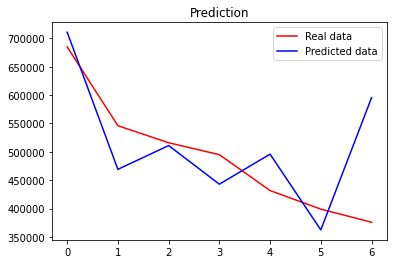

In [9]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()


To indicate the accuracy of the model I use the differences from the table above. 

In [10]:
print("Accuracy =", round(100-np.mean(df_pf['Difference%']), 2))

Accuracy = 84.03


It is expectable that the accuracy of the model will be low, because the data set has just 36 rows.